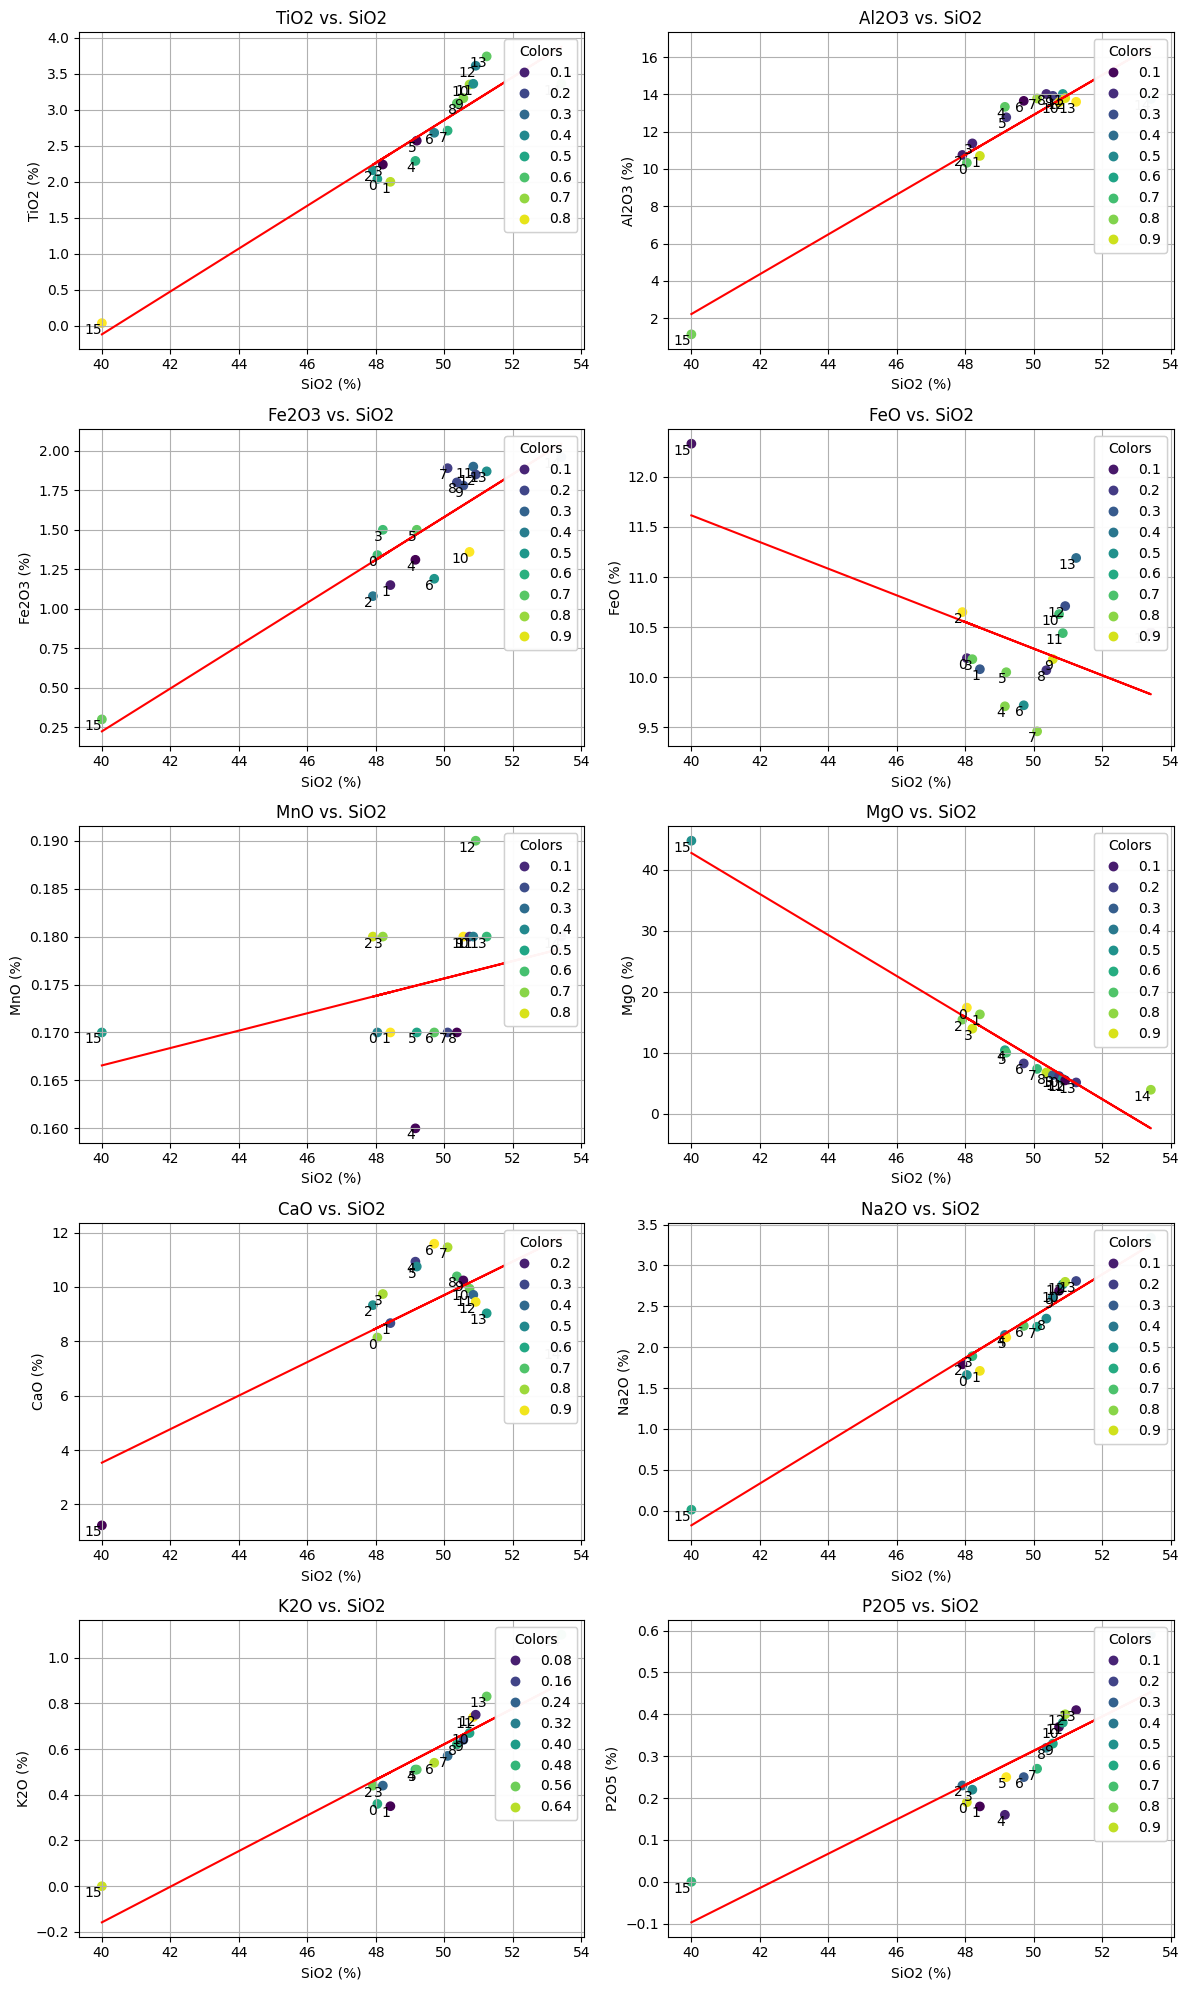

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats       

# Load the data
data = pd.read_csv('PATHTOFILE.csv')
data.columns = data.columns.str.strip()
data = data.drop(columns=['SAMPLE', 'Sum'])

element_names = ['TiO2', 'Al2O3', 'Fe2O3', 'FeO', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5']
SiO2 = data['SiO2']

fig, axs = plt.subplots(len(element_names) // 2, 2, figsize=(12, 20))

for i, name in enumerate(element_names):
    element = data[name]
    row = i // 2
    col = i % 2
    colors = np.random.rand(len(SiO2))  
    slope, intercept, _, _, _ = stats.linregress(SiO2, element)
    scatter = axs[row, col].scatter(SiO2, element, c=colors, cmap='viridis', label='Data Points')
    axs[row, col].plot(SiO2, slope * SiO2 + intercept, color='red', label=f'Slope: {slope:.2f}')
    axs[row, col].legend()

    legend1 = axs[row, col].legend(*scatter.legend_elements(), title='Colors', loc='upper right')
    axs[row, col].add_artist(legend1)

    axs[row, col].set_title(f'{name} vs. SiO2')
    axs[row, col].set_xlabel('SiO2 (%)')
    axs[row, col].set_ylabel(f'{name} (%)')
    axs[row, col].grid(True)

    for j, txt in enumerate(range(len(SiO2)), start=1):
        axs[row, col].annotate(txt, (SiO2.iloc[j - 1], element.iloc[j - 1]), fontsize=10, ha='right', va='top', color='black')

plt.tight_layout()
plt.show()
